In [2]:
import pandas as pd

train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_problem_data.csv', thousands = ',')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_quality_data.csv', thousands = ',')
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_err_data.csv', thousands = ',')

In [3]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [4]:
display(train_err.head())
train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000

user_id            time model_nm       fwver  errtype errcode
0    10000  20201101025616  model_3  05.15.2138       15       1
1    10000  20201101030309  model_3  05.15.2138       12       1
2    10000  20201101030309  model_3  05.15.2138       11       1
3    10000  20201101050514  model_3  05.15.2138       16       1
4    10000  20201101050515  model_3  05.15.2138        4       0

Errortype별 중요도 시각화

In [5]:
import numpy as np

print(np.sort(train_err.errtype.unique()))
# errtype이 1부터 42까지 29를 제외한 41개가 존재.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [6]:
# user_id와 errtype만을 사용하여 데이터 셋 생성
# 모든 일자에 대해서 errtype별 발생 건수를 count
# pandas의 groupby를 활용할 경우 큰 연산 자원이 필요.
# numpy로 placeholder를 만들어 구현함.
from tqdm import tqdm

id_error = train_err[['user_id','errtype']].values
error = np.zeros((train_user_number,42))

for person_idx, err in tqdm(id_error):
    # person_idx - train_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - train_user_id_min,err - 1] += 1
error.shape

100%|██████████| 16554663/16554663 [00:47<00:00, 348966.28it/s]


(15000, 42)

In [7]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [8]:
X = error
y = problem
del error, problem
print(X.shape)
print(y.shape)

(15000, 42)
(15000,)


In [9]:
train_err.errtype.value_counts()

23    2276515
31    1985294
22    1865361
15    1604951
4     1296750
16    1249376
32    1130564
5      952920
40     730378
28     544306
27     540804
26     536401
12     320181
11     307030
14     252015
33     178477
34     165536
10     133403
41     104138
7       51993
6       50482
17      46009
24      39071
42      34374
3       30758
2       26106
13      22843
1       21545
39      15820
35      10187
37       9336
36       9317
38       4539
18       2671
20       2080
25       1184
19        664
21        607
30        402
8         166
9         109
Name: errtype, dtype: int64

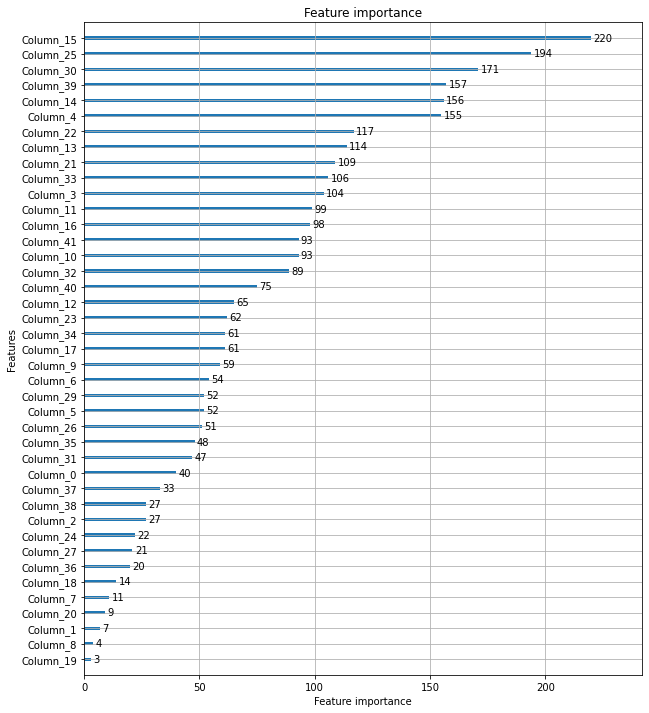

In [10]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

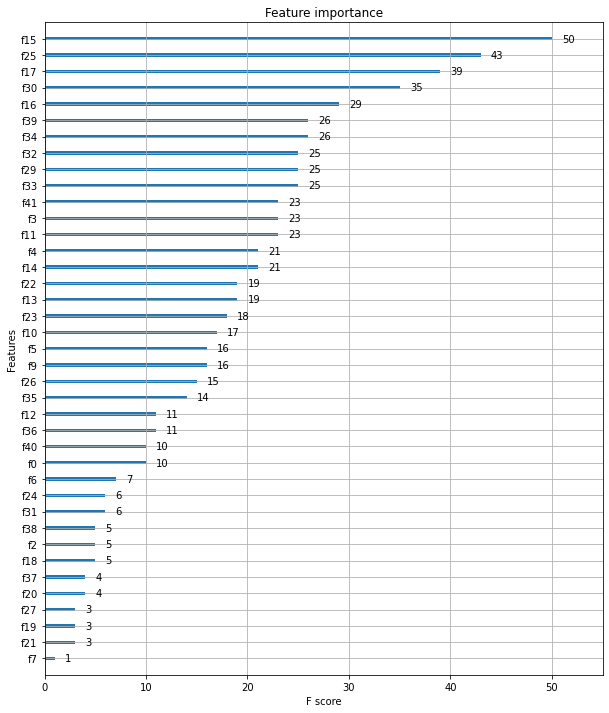

In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

fwver 별 중요도 시각화

In [12]:
import numpy as np

len(np.sort(train_err.fwver.unique()))

37

In [13]:
items = train_err.fwver.unique()
items

array(['05.15.2138', '04.33.1185', '04.33.1261', '04.22.1750',
       '04.22.1778', '04.16.3553', '04.33.1149', '04.16.3571',
       '05.66.3237', '05.66.3571', '03.11.1149', '04.22.1684',
       '03.11.1167', '04.82.1684', '04.82.1778', '04.33.1171',
       '04.73.2237', '10', '04.82.1730', '04.73.2571', '8.5.3',
       '04.22.1666', '03.11.1141', '05.15.2120', '04.33.1125',
       '04.16.3439', '04.22.1442', '04.33.1095', '04.16.3569',
       '05.15.2090', '05.15.3104', '05.15.2122', '04.22.1656',
       '04.16.2641', '05.15.2114', '04.16.3345', '05.15.2092'],
      dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(train_err.fwver)
labels.shape
train_err['fwver_label'] = labels

In [15]:
id_fwver = train_err[['user_id','fwver_label']].values
fwver = np.zeros((train_user_number,37))

for person_idx, fw in tqdm(id_fwver):
    # person_idx - train_user_id_min 위치에 person_idx, fwver에 해당하는 error값을 +1
    fwver[person_idx - train_user_id_min,fw] += 1
fwver.shape

100%|██████████| 16554663/16554663 [00:42<00:00, 387345.02it/s]


(15000, 37)

In [16]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [17]:
X = fwver
y = problem
del fwver, problem
print(X.shape)
print(y.shape)

(15000, 37)
(15000,)


In [18]:
train_err.fwver_label.value_counts()

6     5237816
13    2874213
20    2504871
31    1906479
2     1505659
14    1293946
19     963736
8      145156
21      33537
33      31832
23      23554
25       8601
12       5554
34       3524
17       3272
22       2527
9        2522
1        2114
35       1534
7         980
15        909
29        706
16        408
3         296
36        212
32        191
5         142
4         101
24         78
18         58
10         39
0          29
30         23
27         18
26         12
28          9
11          5
Name: fwver_label, dtype: int64

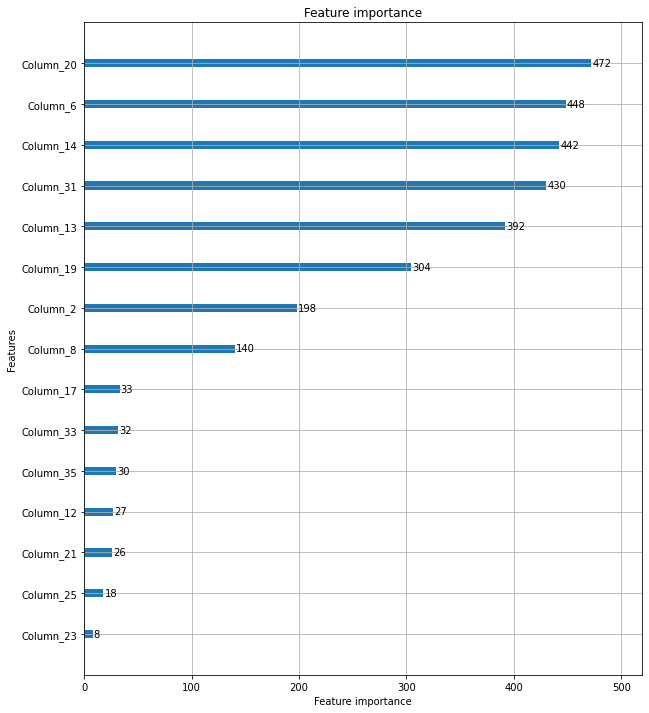

In [19]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

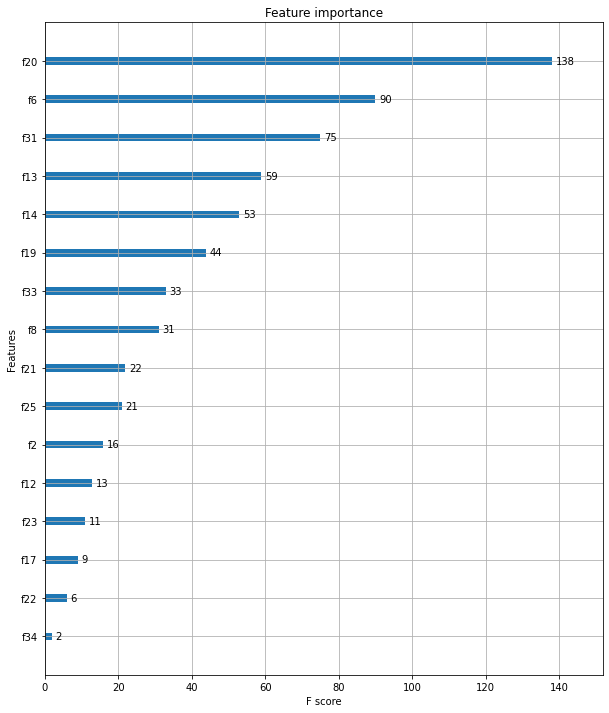

In [20]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

model_nm 별 중요도 시각화

In [21]:
import numpy as np

len(np.sort(train_err.model_nm.unique()))

9

In [22]:
train_err['model_nm'] = train_err['model_nm'].str.split('_').str[1].astype('int64')
train_err

user_id            time  model_nm  ... errtype  errcode fwver_label
0           10000  20201101025616         3  ...      15        1          31
1           10000  20201101030309         3  ...      12        1          31
2           10000  20201101030309         3  ...      11        1          31
3           10000  20201101050514         3  ...      16        1          31
4           10000  20201101050515         3  ...       4        0          31
...           ...             ...       ...  ...     ...      ...         ...
16554658    24999  20201130163051         3  ...      15        1          31
16554659    24999  20201130172625         3  ...      16        1          31
16554660    24999  20201130172625         3  ...       4        0          31
16554661    24999  20201130172631         3  ...       4        0          31
16554662    24999  20201130210625         3  ...      15        1          31

[16554663 rows x 7 columns]

In [23]:
id_model = train_err[['user_id','model_nm']].values
model_nm = np.zeros((train_user_number,9))

for person_idx, mod in tqdm(id_model):
    # person_idx - train_user_id_min 위치에 person_idx, fwver에 해당하는 error값을 +1
    model_nm[person_idx - train_user_id_min,mod] += 1
model_nm.shape

100%|██████████| 16554663/16554663 [00:43<00:00, 384818.43it/s]


(15000, 9)

In [24]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [25]:
X = model_nm
y = problem
del model_nm, problem
print(X.shape)
print(y.shape)

(15000, 9)
(15000,)


In [26]:
train_err.model_nm.value_counts()

1    5384491
0    4176279
2    3473254
3    1907438
4    1507802
8      36064
7      35356
5      32233
6       1746
Name: model_nm, dtype: int64

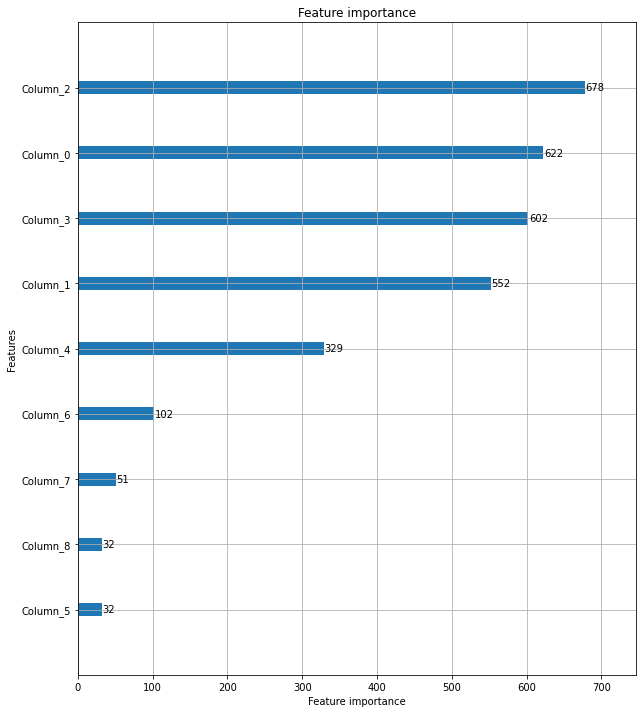

In [27]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

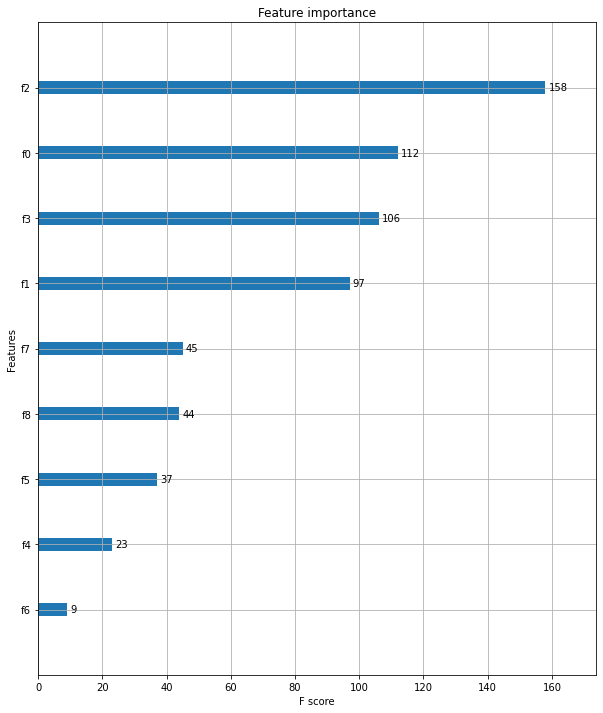

In [28]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

errcode별 중요도 시각화

In [29]:
train_err.dropna(axis = 0, inplace=True)
train_err.shape

(16554662, 7)

In [30]:
items = train_err.errcode.unique().astype(str)
items

array(['1', '0', '2', ..., '4526', '3965', '25999'], dtype='<U39')

In [31]:
len(train_err.errcode.unique())

2805

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(train_err.errcode)
labels.shape

(16554662,)

In [33]:
train_err['errcode_label'] = labels

In [34]:
id_errcode = train_err[['user_id','errcode_label']].values
errcode = np.zeros((train_user_number,2805))

for person_idx, code in tqdm(id_errcode):
    # person_idx - train_user_id_min 위치에 person_idx, fwver에 해당하는 error값을 +1
    errcode[person_idx - train_user_id_min,code] += 1
errcode.shape

100%|██████████| 16554662/16554662 [00:42<00:00, 394035.21it/s]


(15000, 2805)

In [35]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [36]:
X = errcode
y = problem
del errcode, problem
print(X.shape)
print(y.shape)

(15000, 2805)
(15000,)


In [37]:
train_err.errcode_label.value_counts()

4       8906967
2       2599123
2799    1835600
2728     897863
2518     334018
         ...   
1585          1
1586          1
1587          1
1588          1
1402          1
Name: errcode_label, Length: 2805, dtype: int64

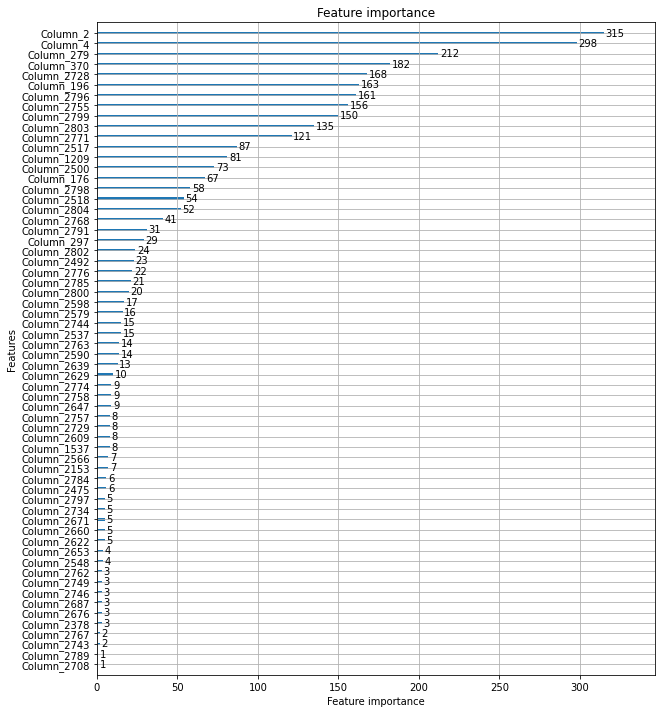

In [38]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

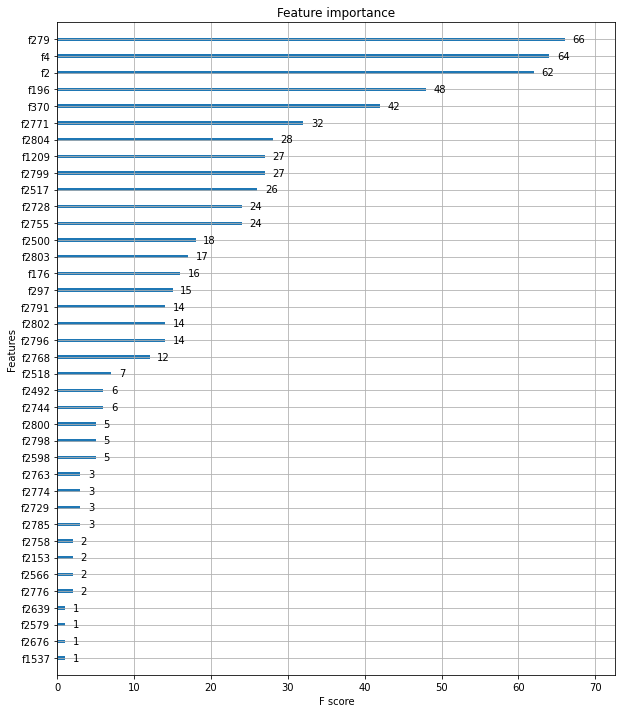

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)

errtype, code 그룹별 중요도 시각화


In [40]:
train_err['errtype_code'] = train_err["errtype"].map(str) + " " + train_err["errcode"].map(str)
train_err

user_id            time  ...  errcode_label errtype_code
0           10000  20201101025616  ...              4         15 1
1           10000  20201101030309  ...              4         12 1
2           10000  20201101030309  ...              4         11 1
3           10000  20201101050514  ...              4         16 1
4           10000  20201101050515  ...              2          4 0
...           ...             ...  ...            ...          ...
16554658    24999  20201130163051  ...              4         15 1
16554659    24999  20201130172625  ...              4         16 1
16554660    24999  20201130172625  ...              2          4 0
16554661    24999  20201130172631  ...              2          4 0
16554662    24999  20201130210625  ...              4         15 1

[16554662 rows x 9 columns]

In [41]:
len(train_err.errtype_code.unique())

2870

In [42]:
items = train_err.errtype_code.unique().astype(str)
items

array(['15 1', '12 1', '11 1', ..., '38 4526', '38 3965', '38 25999'],
      dtype='<U42')

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(train_err.errtype_code)
labels.shape

(16554662,)

In [44]:
train_err['errtype_code_label'] = labels

In [45]:
id_errtypecode = train_err[['user_id','errtype_code_label']].values
errtypecode = np.zeros((train_user_number,2870))

for person_idx, typecode in tqdm(id_errtypecode):
    # person_idx - train_user_id_min 위치에 person_idx, fwver에 해당하는 error값을 +1
    errtypecode[person_idx - train_user_id_min,typecode] += 1
errtypecode.shape

100%|██████████| 16554662/16554662 [00:42<00:00, 387976.30it/s]


(15000, 2870)

In [46]:
problem = np.zeros(15000)
# error와 동일한 방법으로 person_idx - 10000 위치에 
# person_idx의 problem이 한 번이라도 발생했다면 1
# 없다면 0
problem[train_prob.user_id.unique()-10000] = 1 
problem.shape

(15000,)

In [47]:
X = errtypecode
y = problem
del errtypecode, problem
print(X.shape)
print(y.shape)

(15000, 2870)
(15000,)


In [48]:
train_err.errtype_code_label.value_counts()

28      1865361
33      1835562
15      1604951
16      1249376
2783    1175592
         ...   
1607          1
1608          1
1609          1
1610          1
1434          1
Name: errtype_code_label, Length: 2870, dtype: int64

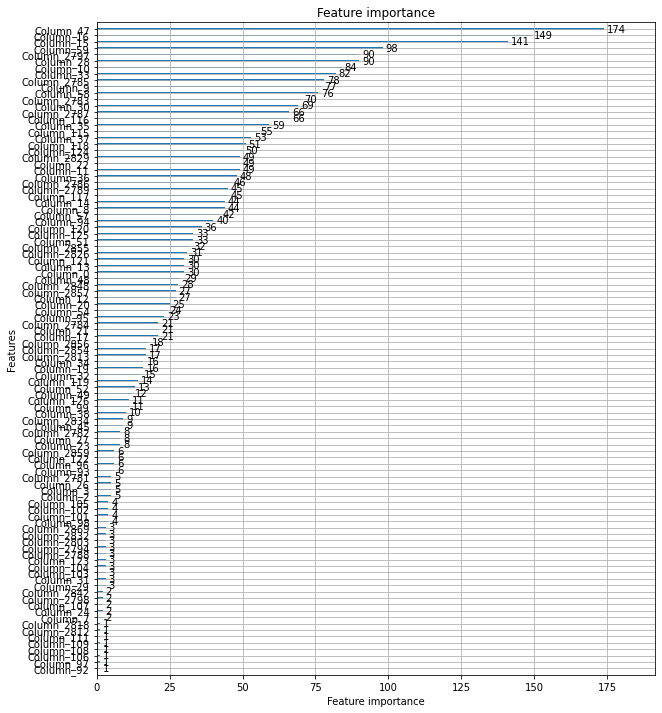

In [49]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

lgbm = LGBMClassifier()
lgbm.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm, ax=ax)

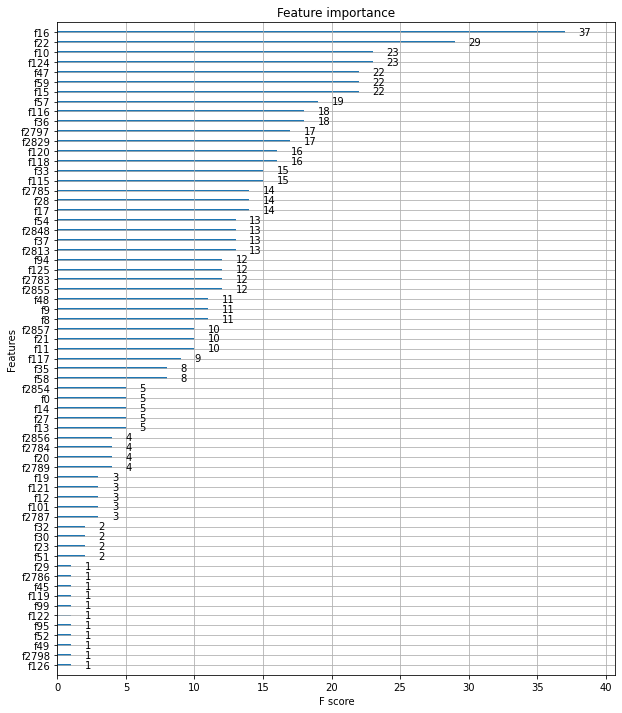

In [50]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

xgb = XGBClassifier()
xgb.fit(X, y)

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb, ax=ax)